In [1]:
# Import the libraries 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [9]:
# nation_position, club_position, player_positions

df = pd.read_csv('players_22.csv', low_memory=False)

# selecting column
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)
df = pd.read_csv('players_22.csv', low_memory=False)

# selecting column
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)

In [10]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

# dropping injured players
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

In [11]:
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# filtering only national teams in the world cup
df = df[df['nationality_name'].isin(teams_worldcup)]

In [12]:
# best players
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

## Distribution of players overall

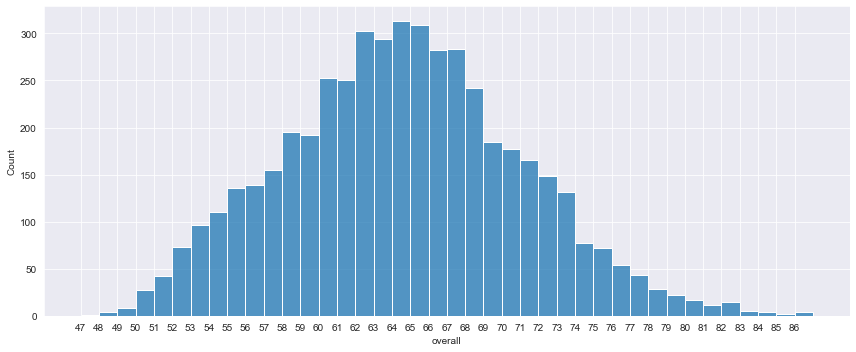

In [13]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

## Dream Team World Cup Players

In [20]:
df.drop_duplicates('player_positions')
# viz -> https://trinket.io/python/0813ea96f6

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
34,W. Szczęsny,31.0,Poland,87.0,87.0,Juventus,42000000.0,105000.0,GK
67,Rodri,25.0,Spain,86.0,89.0,Manchester City,81000000.0,175000.0,CDM
57,R. Varane,28.0,France,86.0,88.0,Manchester United,68500000.0,180000.0,CB
87,Carvajal,29.0,Spain,85.0,85.0,Real Madrid CF,47500000.0,210000.0,RB
137,T. Hernández,23.0,France,84.0,90.0,AC Milan,62500000.0,51000.0,LB
135,André Silva,25.0,Portugal,84.0,85.0,RB Leipzig,51000000.0,110000.0,ST
196,F. Valverde,22.0,Uruguay,83.0,89.0,Real Madrid CF,58000000.0,160000.0,CM
817,Prazeracinho,21.0,Brazil,78.0,78.0,Flamengo,16500000.0,33000.0,LW
1048,Muo Cadete,21.0,Brazil,77.0,77.0,Palmeiras,12500000.0,28000.0,LM
1454,Tete,21.0,Brazil,76.0,86.0,Shakhtar Donetsk,17000000.0,800.0,RM


## The Most Skillful Players on each National Team

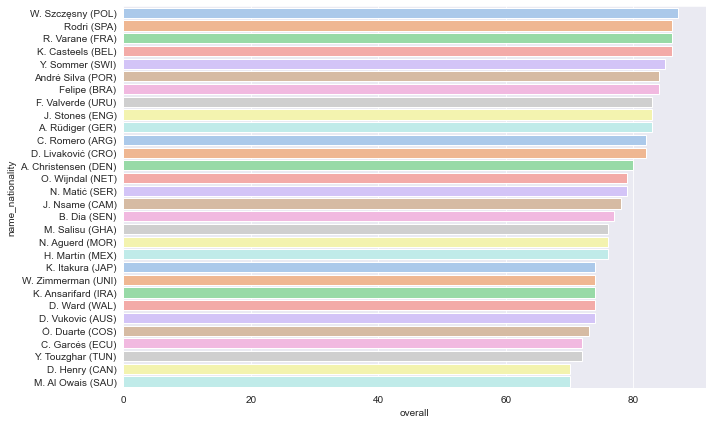

In [29]:
df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(x='overall', y='name_nationality', data=df_best_players,
            palette=sns.color_palette('pastel'))
plt.show()

## Best Squad per Team

In [30]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [31]:
best_squad('Brazil')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
815,Fredditinho,33.0,Brazil,78.0,78.0,Palmeiras,9000000.0,43000.0,ST
1117,Vinícius,26.0,Brazil,77.0,80.0,PSV,14000000.0,16000.0,ST
2888,Claudiosa Paes,33.0,Brazil,73.0,73.0,São Paulo,1900000.0,31000.0,RW
3592,Dersan Dinis,29.0,Brazil,72.0,72.0,Palmeiras,2300000.0,28000.0,RW
1454,Tete,21.0,Brazil,76.0,86.0,Shakhtar Donetsk,17000000.0,800.0,RM
2881,Brenito Duarte,29.0,Brazil,73.0,73.0,Cuiabá,3000000.0,15000.0,RM
626,Adnan Vidual,29.0,Brazil,79.0,79.0,Internacional,15500000.0,32000.0,RB
1833,Jesus Andradaldo,29.0,Brazil,75.0,75.0,Grêmio,4900000.0,26000.0,RB
817,Prazeracinho,21.0,Brazil,78.0,78.0,Flamengo,16500000.0,33000.0,LW
3597,Vicemte Tófoli,25.0,Brazil,72.0,72.0,RB Bragantino,2600000.0,13000.0,LW


In [32]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
1,Brazil,77.333333
6,Spain,74.086957
7,Portugal,72.285714
12,Uruguay,71.842105
3,France,71.444444
20,Serbia,71.125000
13,Switzerland,71.000000
21,Poland,70.714286
15,Croatia,70.714286
4,Argentina,70.666667


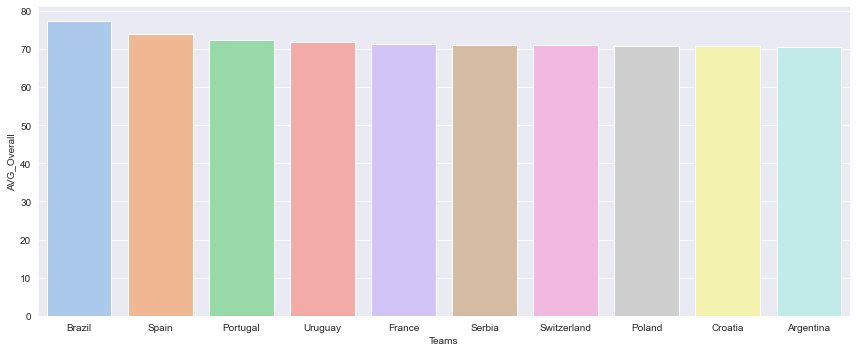

In [34]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.barplot(data=df_average_overall[:10], x='Teams', y='AVG_Overall',
            palette=sns.color_palette('pastel'))

plt.show()

## Best Formation for each team

In [35]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [36]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [37]:
for index, row in df_average_overall[:9].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)

Brazil 4-4-2 79.27272727272727
Spain 4-4-2 78.81818181818181
Portugal 4-4-2 75.63636363636364
Uruguay 4-4-2 75.9090909090909
France 4-4-2 78.0909090909091
Serbia 4-4-2 73.77777777777777
Switzerland 4-3-3 74.55555555555556
Poland 4-4-2 74.0
Croatia 4-4-2 74.875


In [38]:
# best_lineup('Spain', dict_formation['4-2-3-1'])
# best_lineup('Argentina', dict_formation['4-3-3'])
best_lineup('Brazil', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
815,Fredditinho,78.0,Palmeiras,ST
2888,Claudiosa Paes,73.0,São Paulo,RW
626,Adnan Vidual,79.0,Internacional,RB
817,Prazeracinho,78.0,Flamengo,LW
386,Renan Lodi,81.0,Atlético de Madrid,LB
222,Neto,82.0,FC Barcelona,GK
483,Gerson,80.0,Olympique de Marseille,CM
294,Lucas Leiva,81.0,Lazio,CDM
2890,Marlon Nideiro,73.0,Grêmio,CAM
120,Felipe,84.0,Atlético de Madrid,CB


**By:_** **DataSpieler12345**